#### 다중 회귀
*   선형 회귀 : 하나의 특성을 사용 (직선 학습)
*   다중 회귀 : 여러 개의 특성을 사용한 선형 회귀 (평면 학습) / 타깃 = a *
특성1 + b * 특성2 + 절편


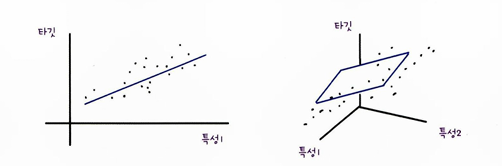



In [2]:
# 입력 데이터(특성 3개) 준비
import pandas as pd
# read_csv() : CSV 파일을 로컬 컴퓨터나 인터넷에서 읽어 판다스 데이터프레임으로 변환하는 함수
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:
# 타깃 데이터 준비
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [4]:
# 훈련 세트와 테스트 세트로 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

#### 특성 공학
주어진 특성을 조합하여 새로운 특성을 만드는 일련의 작업 과정

💠 사이킷런의 변환기
*   특성을 만들거나 전처리하는 클래스 ex) PolynomialFeatures, StandardScaler 등
*   fit (), transform () 메소드 제공

In [1]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# PolynomialFeatures : 기본적으로 각 특성의 제곱과 특성끼리 곱한 항 추가
# include_bias=False로 지정하지 않아도 사이킷런 모델은 자동으로 특성에 추가된 절편 항 무시 (사이킷런의 선형 모델은 자동으로 절편을 추가). 여기에서는 혼돈을 피하기 위해 명시적으로 지정
poly = PolynomialFeatures(include_bias=False) #객체 생성
poly.fit([[2, 3]]) # 특성의 개수 파악, 새롭게 만들 특성 조합 준비
print(poly.transform([[2, 3]])) #  데이터 변환

[[2. 3. 4. 6. 9.]]


In [7]:
# train_input에 PolynomialFeatures 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape) # train_poly 배열의 열의 개수가 특성의 개수

(42, 9)


In [8]:
# get_feature_names_out() : 특성이 각각 어떤 입력의 조합으로 만들어졌는지 확인
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [11]:
# 테스트 세트 변환
test_poly = poly.transform(test_input)

#### 다중 회귀 모델 훈련하기

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [13]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [14]:
#  5제곱까지 특성을 만들어 출력
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [15]:
print(train_poly.shape)

(42, 55)


In [16]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [17]:
print(lr.score(test_poly, test_target))
# 특성의 개수를 크게 늘리면 선형 모델은 아주 강력해짐. 훈련 세트에 대해 거의 완벽하게 학습 가능
# but 과대적합 - 테스트 세트에서는 형편없는 점수 -> 다시 특성을 줄여야함!!

-144.40579436844948


#### 규제
*   모델이 훈련 세트에 과대적합되지 않도록 만드는 것
*   선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일

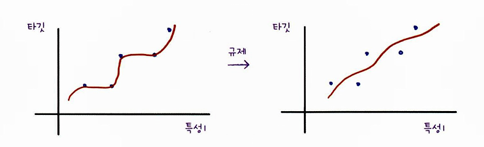

-> 규제를 적용할 때 특성의 스케일이 많이 다르면 공정하게 제어x

따라서 규제를 적용하기 전에 정규화 먼저 해야함! - StandardScaler 클래스 사용




💠선형 회귀 모델에 규제를 추가한 모델
*   릿지 : 계수를 제곱한 값을 기준으로 규제 적용, 일반적으로 더 선호됨
*   라쏘 : 계수의 절댓값을 기준으로 규제 적용, 계수를 0으로 만들 수도 있음

💠
하이퍼파라미터 : 머신러닝 모델이 학습할 수 없고 사람이 사전에 지정해야 하는 파라미터 ex) 규제 강도 조절 : alpha
*   alpha 값이 크면? 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도
*   alpha 값이 작으면? 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 큼



In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() #객체 생성
ss.fit(train_poly) # 훈련
#표준점수로 변환
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#### 릿지

In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge() # 객체 생성
ridge.fit(train_scaled, train_target) # 훈련
print(ridge.score(train_scaled, train_target)) # 평가

0.9896101671037343


In [22]:
# 테스트 세트 점수 확인
print(ridge.score(test_scaled, test_target))

# 많은 특성을 사용했음에도 불구하고 훈련 세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있습니다.

0.9790693977615387


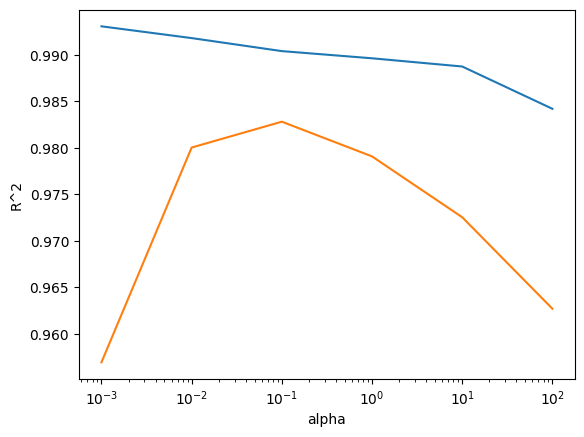

In [26]:
# 적절한 alpha 값을 찾는 방법 : alpha 값에 대한 결정계수 값의 그래프를 그리기
# 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값!!!

# alpha 값을 0.001 에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 점수를 파이썬 리스트에 저장 후 그래프 그리기
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha) # 릿지 모델 생성
    ridge.fit(train_scaled, train_target) # 릿지 모델 훈련
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log') #  alpha_list에 있는 6개의 값을 동일한 간격으로 나타내려면 x축을 로그 스케일로 나타내기
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 10^(-1) = 0.1

In [27]:
# alpha 값을 0.1로 하여 최종 모델 훈련

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


#### 라쏘

In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [29]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


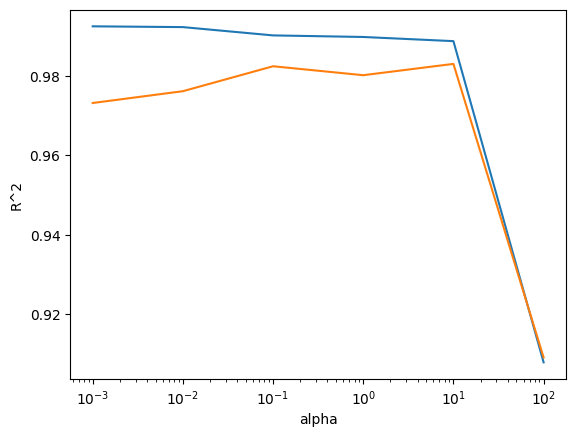

In [33]:
# 규제 강도 조절 : 최적의 alpha 값 찾기
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000) # 라쏘 모델 생성 # max_iter : 알고리즘의 수행 반복 횟수 지정
    lasso.fit(train_scaled, train_target) # 라쏘 모델 훈련
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 최적의 alpha 값은 10

In [34]:
# alpha 값을 10으로 하여 최종 모델 훈련
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

# 특성을 많이 사용했지만, 릿지와 마찬가지로 라쏘 모델이 과대적합을 잘 억제하고 테스트 세트의 성능을 크게 높임

0.9888067471131867
0.9824470598706695


In [ ]:
# 계수가 0인 특성 개수
# np.sum() : 배열을 모두 더한 값 반환
print(np.sum(lasso.coef_ == 0))

# 55개의 특성을 모델에 주입했지만 라쏘 모델이 사용한 특성은 15개 밖에 되지 않음
# 이런 특징 때문에 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있음

40


💬 표준화에 대해..
*   LinearRegression 클래스는 해석적으로 해를 구함. 즉, 알려진 공식을 사용하여 문제를 품
->  특성 간의 스케일 차이가 문제가 되지 않기 때문에 표준화 필요 X (표준화를 적용해도 무방)
*   Lidge와 Lasso 클래스가 해를 구하는 방식은 특성의 스케일에 영향을 받기 때문에 표준화를 수행해야 함

👍 사이킷런에서 제공하는 대부분의 모델뿐만 아니라 인공신경망 알고리즘도 특성의 스케일 차이에 영향을 받으므로 모델을 훈련하기 전에 표준화와 같은 방법으로 특성의 스케일을 조정하는 것이 대부분 바람직